In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/titanic.csv", index_col="PassengerId")
df.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

<AxesSubplot:>

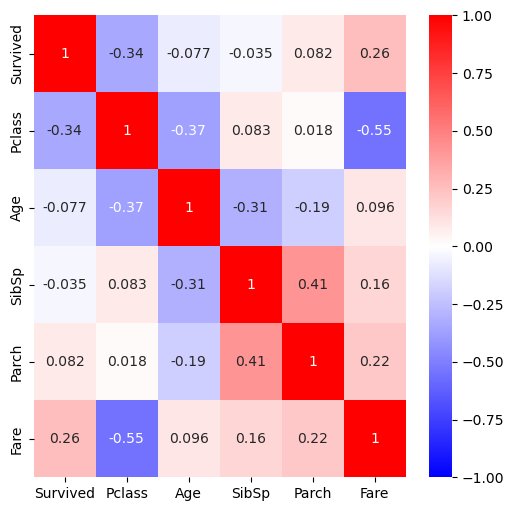

In [3]:
# drop unrelevan table
plt.figure(figsize=(6,6))
sns.heatmap(data=df.corr(), vmin=-1, vmax=1, annot=True, cmap="bwr")

In [4]:
df.drop(columns=["Name", "Ticket", "Cabin", "Age"], inplace=True)
df.head()

Survived  Pclass     Sex  SibSp  Parch     Fare Embarked
PassengerId                                                          
1                   0       3    male      1      0   7.2500        S
2                   1       1  female      1      0  71.2833        C
3                   1       3  female      0      0   7.9250        S
4                   1       1  female      1      0  53.1000        S
5                   0       3    male      0      0   8.0500        S

## Check missing value

<AxesSubplot:ylabel='PassengerId'>

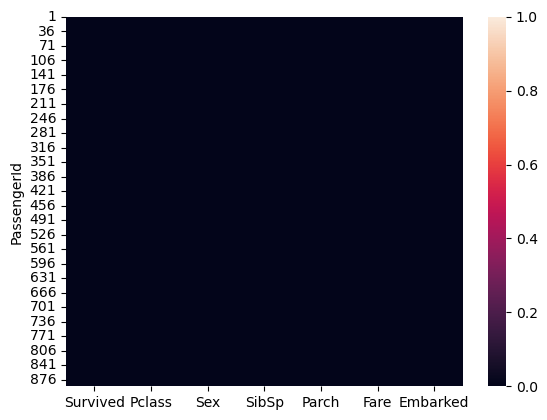

In [5]:
sns.heatmap(data=df.isna())

In [6]:
# drop table 'age'

In [7]:
df["Embarked"].fillna(1, inplace=True)

In [8]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(df, columns=["Embarked", "Sex", "Pclass"]).drop(columns="Survived")
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.2, 
                                                    random_state=42
                                                   )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 12), (179, 12), (712,), (179,))

In [10]:
X_train

SibSp  Parch      Fare  Embarked_1  Embarked_C  Embarked_Q  \
PassengerId                                                               
693              0      0   56.4958           0           0           0   
482              0      0    0.0000           0           0           0   
528              0      0  221.7792           0           0           0   
856              0      1    9.3500           0           0           0   
802              1      1   26.2500           0           0           0   
...            ...    ...       ...         ...         ...         ...   
360              0      0    7.8792           0           0           1   
259              0      0  512.3292           0           1           0   
737              1      3   34.3750           0           0           0   
463              0      0   38.5000           0           0           0   
508              0      0   26.5500           0           0           0   

             Embarked_S  Sex_female  Sex_male  Pclass_1  Pclass_2  Pclass_3  
PassengerId                                                                  
693                   1           0         1         0         0         1  
482                   1           0         1         0         1         0  
528                   1           0         1         1         0         0  
856                   1           1         0         0         0         1  
802                   1           1         0         0         1         0  
...                 ...         ...       ...       ...       ...       ...  
360                   0           1         0         0         0         1  
259                   0           1         0         1         0         0  
737                   1           1         0         0         0         1  
463                   1           0         1         1         0         0  
508                   1           0         1         1         0         0  

[712 rows x 12 columns]

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=3, weights="distance", metric="manhattan")

# Fitting
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [13]:
knn.score(X_test, y_test)

0.770949720670391

## Improve Model -- Feature Scalling (MinMaxScale)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[0.        , 0.        , 0.11027246, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.43288417, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.125     , 0.5       , 0.06709553, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.075147  , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.05182215, ..., 1.        , 0.        ,
        0.        ]])

In [16]:
knn_improved = KNeighborsClassifier(n_neighbors=3, weights="distance", metric="manhattan")
knn_improved.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [17]:
knn_improved.score(X_test_scaled, y_test) # MALAH MEMPERBURUK ASUUU

0.7653631284916201

## Parameter Tuning | Model Tuning

Test Model : 0.7541899441340782
Neighbor : 3


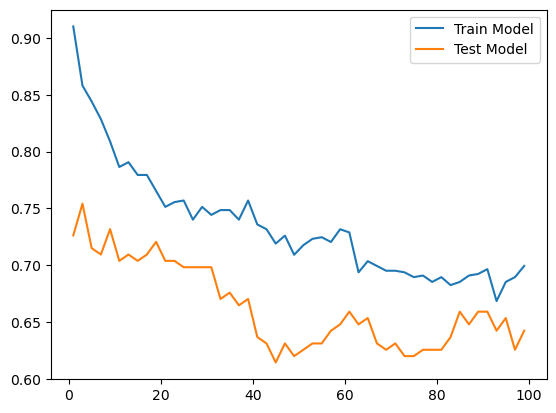

In [27]:
import numpy as np

neighbors = range(1, 101, 2)
train_score = []
test_score = []

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))
    
plt.plot(neighbors, train_score, label="Train Model")    
plt.plot(neighbors, test_score, label="Test Model")
plt.legend()

print(f"Test Model : {np.max(test_score)}")
print(f"Neighbor : {neighbors[np.argmax(test_score)]}")

### With Scalling

Test Model : 0.7988826815642458
Neighbor : 29


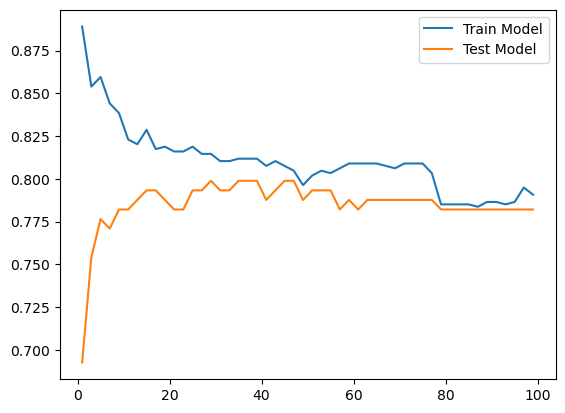

In [28]:
import numpy as np

neighbors = range(1, 101, 2)
train_score = []
test_score = []

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    
    train_score.append(model.score(X_train_scaled, y_train))
    test_score.append(model.score(X_test_scaled, y_test))
    
plt.plot(neighbors, train_score, label="Train Model")    
plt.plot(neighbors, test_score, label="Test Model")
plt.legend()

print(f"Test Model : {np.max(test_score)}")
print(f"Neighbor : {neighbors[np.argmax(test_score)]}")

### Weight = Distance and use Metric Manhattan

Test Model : 0.7988826815642458
Neighbor : 55


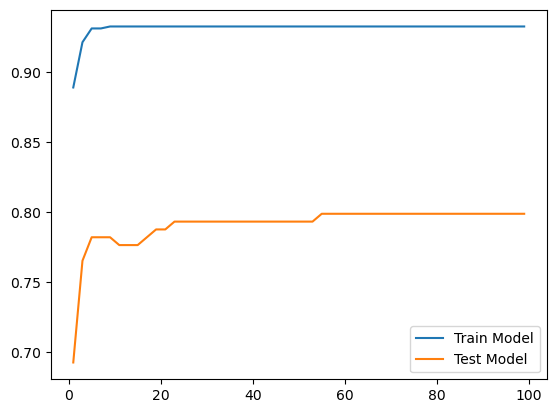

In [30]:
import numpy as np

neighbors = range(1, 101, 2)
train_score = []
test_score = []

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="manhattan")
    model.fit(X_train_scaled, y_train)
    
    train_score.append(model.score(X_train_scaled, y_train))
    test_score.append(model.score(X_test_scaled, y_test))
    
plt.plot(neighbors, train_score, label="Train Model")    
plt.plot(neighbors, test_score, label="Test Model")
plt.legend()

print(f"Test Model : {np.max(test_score)}")
print(f"Neighbor : {neighbors[np.argmax(test_score)]}")